## Kiểm tra điều kiện môn Trực quan hóa dữ liệu
email gửi file: vtran@utc.edu.vn <br/>
***Họ tên: Nguyễn Văn Hòa <br/>
MSV: 193012244***

In [57]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

In [58]:
data = load_wine().data
features = load_wine().feature_names
label = load_wine().target.reshape(-1,1)

In [ ]:
data.shape, label

In [59]:
wine_data = np.hstack((data,label))

In [60]:
df = pd.DataFrame(data = wine_data, columns = features+['WineCategory'])

In [61]:
df.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,WineCategory
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0


### Câu 1: Chọn 1 thuộc tính trong số các thuộc tính và vẽ biểu đồ tần số tương ứng

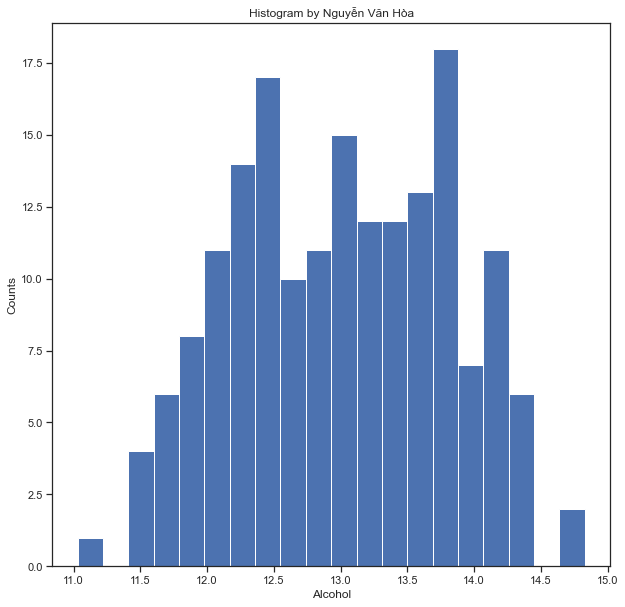

In [62]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
plt.hist(df['alcohol'], bins = 20)
# Khai báo tiêu đề cho trục x
plt.title('Histogram by Nguyễn Văn Hòa')
plt.xlabel('Alcohol')
# Khai báo tiêu đề cho trục y
plt.ylabel('Counts')
plt.show()

### Câu 2: Chọn 2 thuộc tính trong số các thuộc tính và vẽ biểu đồ Scatter tương ứng

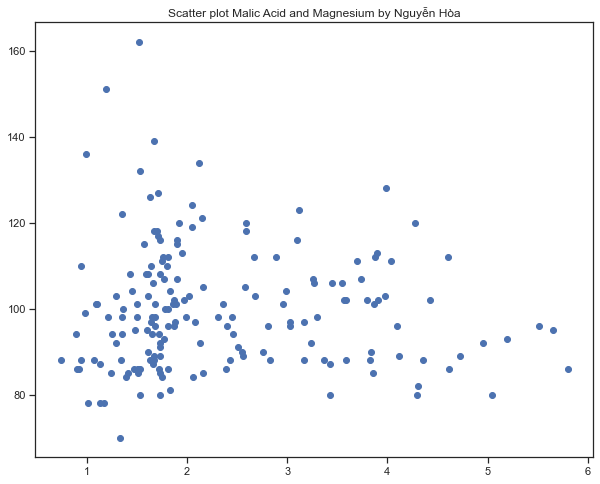

In [63]:
fig = plt.figure(figsize=(10,8))
plt.scatter(df['malic_acid'],df['magnesium'])
plt.title('Scatter plot Malic Acid and Magnesium by Nguyễn Hòa')
plt.show()

### Câu 3: Vẽ biểu đồ scatter plot matrix biểu diễn dữ liệu

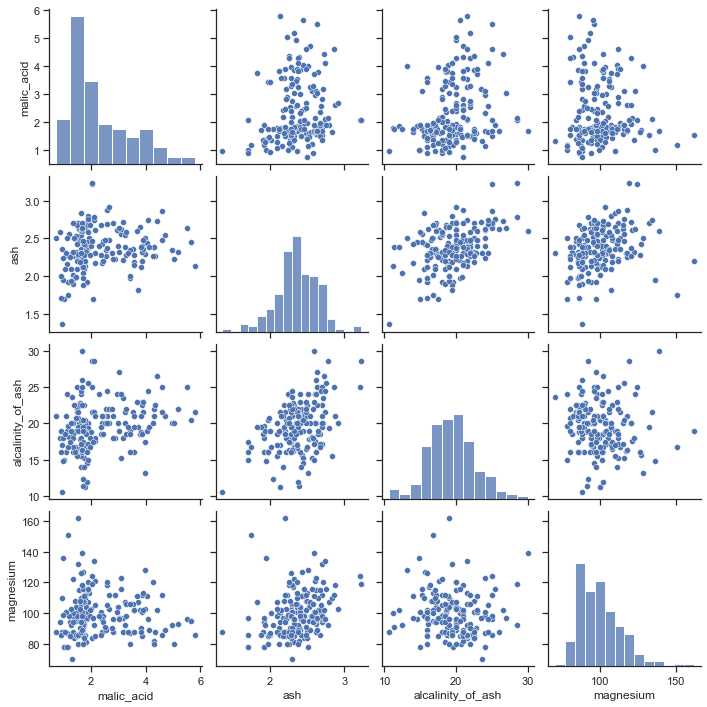

In [64]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df[df.columns[1:5].tolist()])

### Câu 4: Sử dụng thư viện Bokeh, thiết kế mô hình tương tác để lựa chọn các thuộc tính và vẽ biểu đồ scatter

In [65]:
from bokeh.io import output_file,show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from ipywidgets import interact, interact_manual
from bokeh.plotting import figure, output_file,show,output_notebook
output_notebook()

Loading BokehJS ...

In [66]:
df['WineCategory'] = df.WineCategory.astype(str)

In [67]:
from bokeh.models import CategoricalColorMapper
mapper = CategoricalColorMapper(
        factors= ['0.0','1.0','2.0'],
        palette=['red','green','blue'])

In [68]:
features = df.columns[:-1]
@interact(feature1=features,feature2=features)
def nvh(feature1,feature2):
    source = ColumnDataSource(df)
    p1 = figure( plot_width=500, plot_height=500)
    p1.circle(feature1,feature2,source= source,color={'field':'WineCategory','transform':mapper},
        legend='WineCategory') 
    layout= p1
    show(layout)

interactive(children=(Dropdown(description='feature1', options=('alcohol', 'malic_acid', 'ash', 'alcalinity_of…

### Câu 5: Sử dụng phương pháp Star Coordinates để biểu diễn dữ liệu nhiều chiều

In [69]:
from sklearn.preprocessing import MinMaxScaler
wine_scaled = MinMaxScaler().fit_transform(df)

In [70]:
X = wine_scaled
n ,m = X.shape

In [71]:
V = np.zeros((m,2))

In [72]:
for i in range(len(V)):
    V[i][0]= np.cos(2*np.pi*(i)/m)
    V[i][1]= np.sin(2*np.pi*(i)/m)

In [73]:
Y = X.dot(V)

In [74]:
max(Y[:,1])

1.2831341406578303

In [75]:
df['WineCategory'] = df.WineCategory.astype(str)
color= []
for label in df['WineCategory']:
    if label == '0.0':
        color.append('red')
    elif label=='1.0':
        color.append('green') 
    else:
        color.append('blue') 

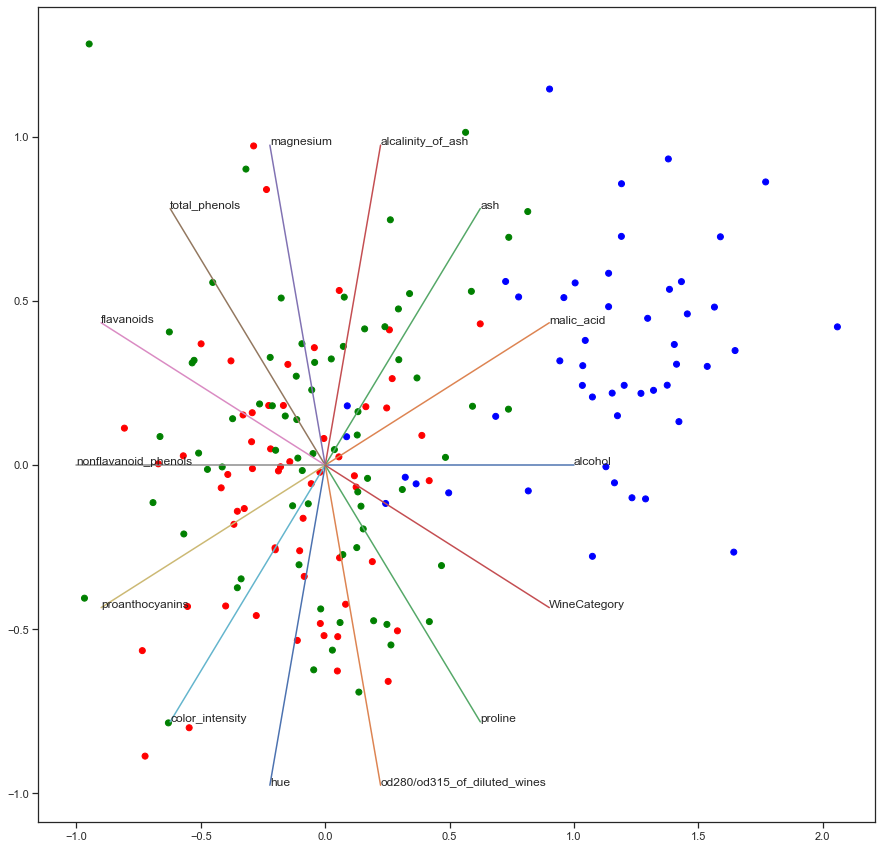

In [79]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,15))
plt.scatter(Y[:,0],Y[:,1],color=color)
texts= df.columns.tolist()
for i in range(len(V)):
    plt.plot([0,V[i][0]],[0,V[i][1]],'-')
    plt.text(V[i][0], V[i][1], texts[i],fontsize=12)
plt.show()